In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load dataset

In [2]:
df_telco = pd.read_csv('telco_customer_churn.csv', header=0)

print('Dimension of the dataset:')
print(df_telco.shape)

print('\nTop five records:')
df_telco.head()

Dimension of the dataset:
(7043, 21)

Top five records:


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [3]:
print('\nColumn types:')
print(df_telco.info())


Column types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

In [4]:
set(df_telco.isna().sum())

{0}

In [5]:
set(df_telco['Churn'])

{0, 1}

### Check the proportion of the labels

In [6]:
df_telco.groupby(['Churn']).size() / df_telco.shape[0] * 100

Churn
0    73.463013
1    26.536987
dtype: float64

In [7]:
df_telco.nunique()
# df_telco.value_counts()

CustomerID          7043
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
Tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### Customer churn in relation to gender and partner

/var/folders/kq/l8t37b256g77l0jj_rpgwh9r0000gn/T/ipykernel_25030/3924752362.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s2.set_xticklabels(['With partner', 'Without partner'])


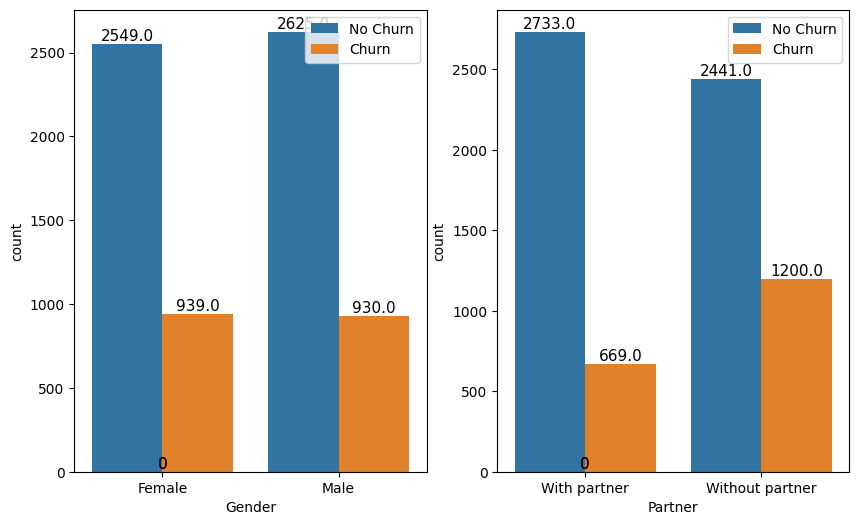

In [8]:
# plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
s1 = sns.countplot(data=df_telco, x='Gender', hue='Churn', ax=ax[0])
s2 = sns.countplot(data=df_telco, x='Partner', hue='Churn', ax=ax[1])

# write count labels in the plot
for plot in [s1, s2]:
    for rect in plot.patches:
        plot.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 20, rect.get_height(), horizontalalignment='center', fontsize=11)

s1.legend(['No Churn', 'Churn'])
s2.legend(['No Churn', 'Churn'])
s2.set_xticklabels(['With partner', 'Without partner'])
plt.show()
# plt.savefig('3.2.1 quantity rugplot.png', dpi=100)

### Relation between customer churn and tenure

/var/folders/kq/l8t37b256g77l0jj_rpgwh9r0000gn/T/ipykernel_25030/1847769007.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s2.set_xticklabels(['No', 'Yes'])


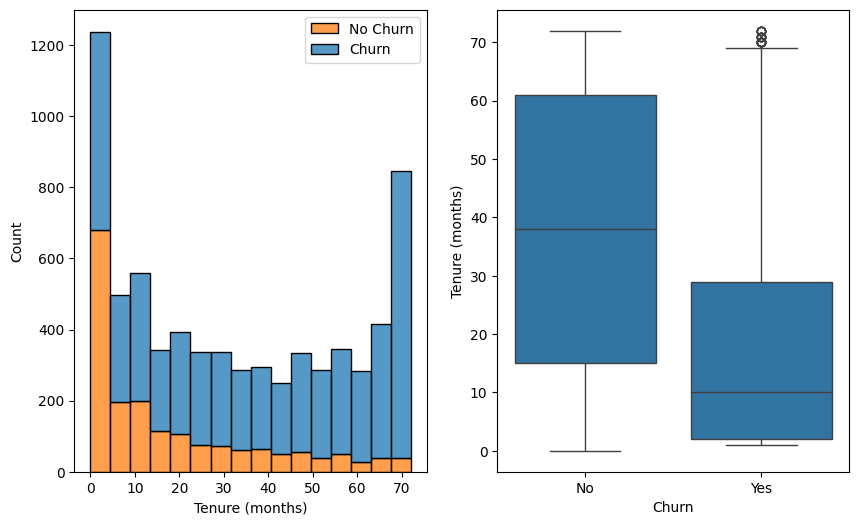

In [9]:
# plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
s1 = sns.histplot(data=df_telco, x='Tenure', hue='Churn', multiple="stack", ax=ax[0])
s2 = sns.boxplot(data=df_telco, x='Churn', y='Tenure', ax=ax[1])

s1.set_xlabel('Tenure (months)')
s2.set_ylabel('Tenure (months)')

s1.legend(['No Churn', 'Churn'])
s2.set_xticklabels(['No', 'Yes'])

plt.show()
# plt.savefig('3.2.1 quantity rugplot.png', dpi=100)

### Customer churn in relation to contract types and monthly charge

/var/folders/kq/l8t37b256g77l0jj_rpgwh9r0000gn/T/ipykernel_25030/1772584661.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s2.set_xticklabels(['No', 'Yes'])


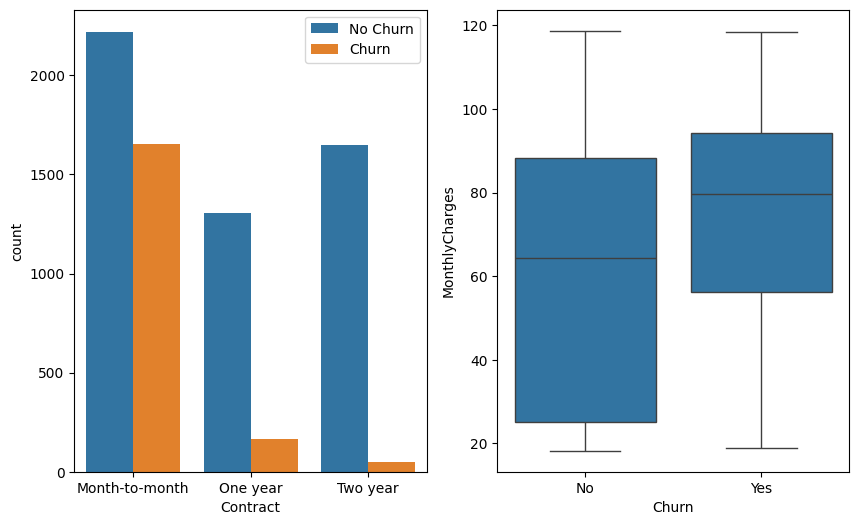

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

s1 = sns.countplot(data=df_telco, x='Contract', hue='Churn', ax=ax[0])
s2 = sns.boxplot(data=df_telco, y='MonthlyCharges', x='Churn', ax=ax[1])

s1.legend(['No Churn', 'Churn'])
s2.set_xticklabels(['No', 'Yes'])

plt.show()
# plt.savefig('3.2.1 quantity rugplot.png', dpi=100)


### Customer churn in relation to StreamingTV and StreamingMovies

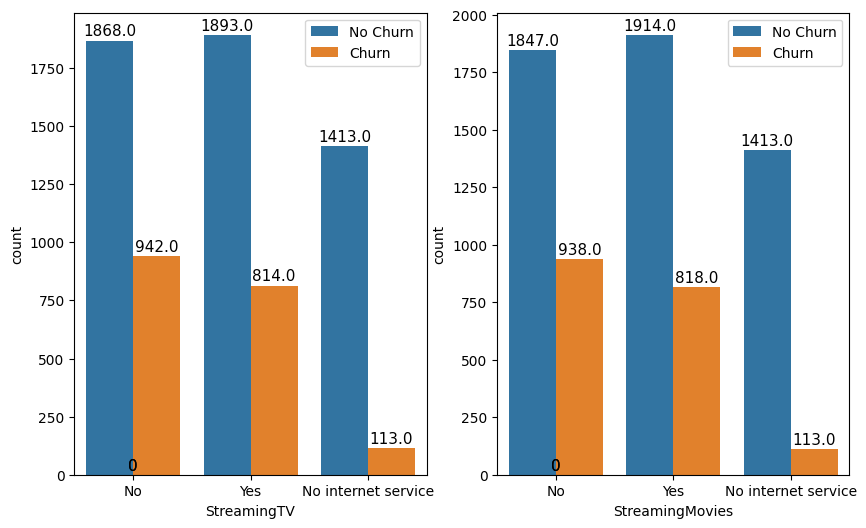

In [11]:
# plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
s1 = sns.countplot(data=df_telco, x='StreamingTV', hue='Churn', ax=ax[0])
s2 = sns.countplot(data=df_telco, x='StreamingMovies', hue='Churn', ax=ax[1])

# write count labels in the plot
for plot in [s1, s2]:
    for rect in plot.patches:
        plot.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 20, rect.get_height(), horizontalalignment='center', fontsize=11)

s1.legend(['No Churn', 'Churn'])
s2.legend(['No Churn', 'Churn'])
plt.show()
# plt.savefig('3.2.1 quantity rugplot.png', dpi=100)

### Customer churn in relation to additional service consumers

/var/folders/kq/l8t37b256g77l0jj_rpgwh9r0000gn/T/ipykernel_25030/1679133143.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax[i], order=['Yes', 'No'], palette="tab10")
/var/folders/kq/l8t37b256g77l0jj_rpgwh9r0000gn/T/ipykernel_25030/1679133143.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax[i], order=['Yes', 'No'], palette="tab10")
/var/folders/kq/l8t37b256g77l0jj_rpgwh9r0000gn/T/ipykernel_25030/1679133143.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax[i], 

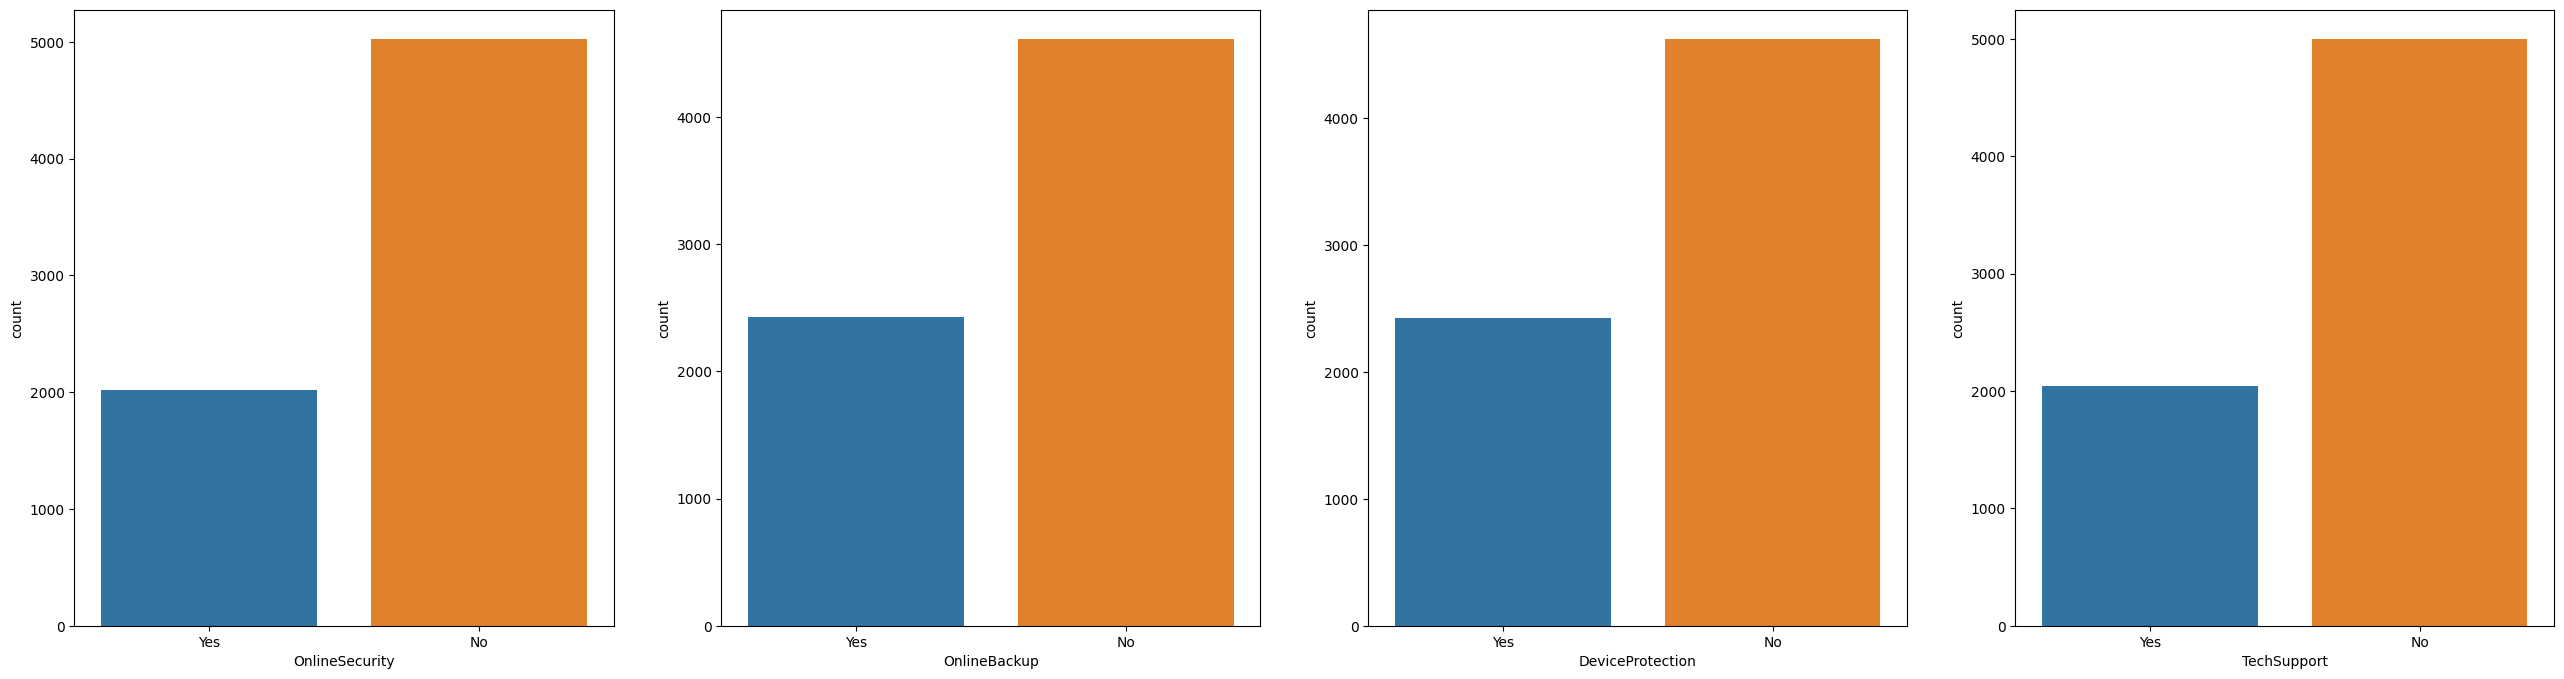

In [12]:
# df = df_telco[df_telco['Churn'] == 1]
df = df_telco

services = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport'
]
df = df[services]
df = df.apply(lambda x: x.apply(lambda y: 'No' if 'No' in y else 'Yes')).reset_index(drop=True) # the other bucket: no internet service

fig, ax = plt.subplots(1, len(services), figsize=(len(services)*8, 8))
for i, col in enumerate(services):
    sns.countplot(data=df, x=col, ax=ax[i], order=['Yes', 'No'], palette="tab10")


plt.show()
# plt.savefig('3.2.1 quantity rugplot.png', dpi=100)

### Customer churn in relation to payment method and paperless billing

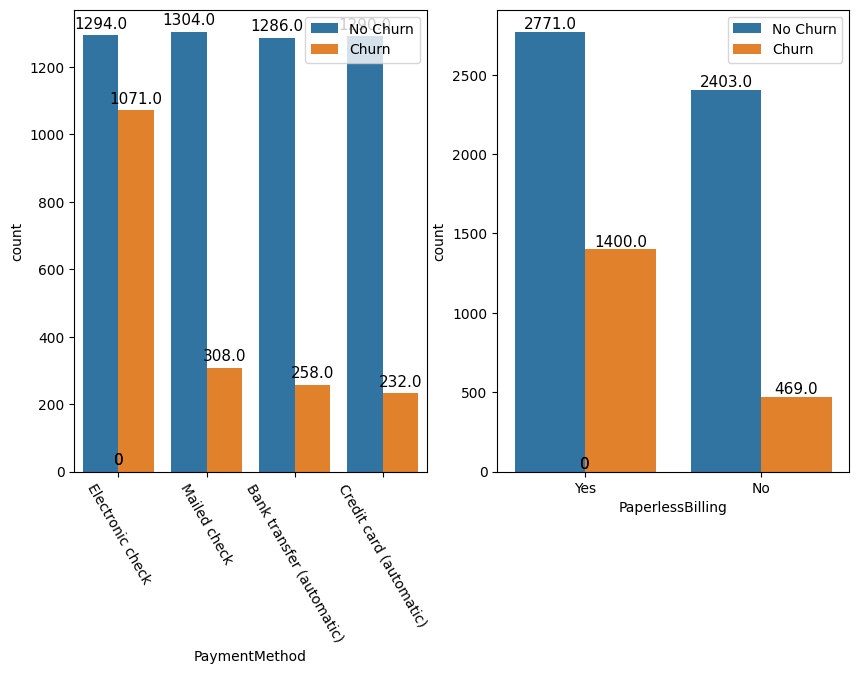

In [13]:
# plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
s1 = sns.countplot(data=df_telco, x='PaymentMethod', hue='Churn', ax=ax[0])
s1.tick_params(axis='x', rotation=300)
s2 = sns.countplot(data=df_telco, x='PaperlessBilling', hue='Churn', ax=ax[1])

# write count labels in the plot
for plot in [s1, s2]:
    for rect in plot.patches:
        plot.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 20, rect.get_height(), horizontalalignment='center', fontsize=11)

s1.legend(['No Churn', 'Churn'])
s2.legend(['No Churn', 'Churn'])

plt.show()
# plt.savefig('3.2.1 quantity rugplot.png', dpi=100)

### Customer churn in relation to monthly charges and total charges

/var/folders/kq/l8t37b256g77l0jj_rpgwh9r0000gn/T/ipykernel_25030/1603074338.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s1.set_xticklabels(['No', 'Yes'])
/var/folders/kq/l8t37b256g77l0jj_rpgwh9r0000gn/T/ipykernel_25030/1603074338.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s2.set_xticklabels(['No', 'Yes'])


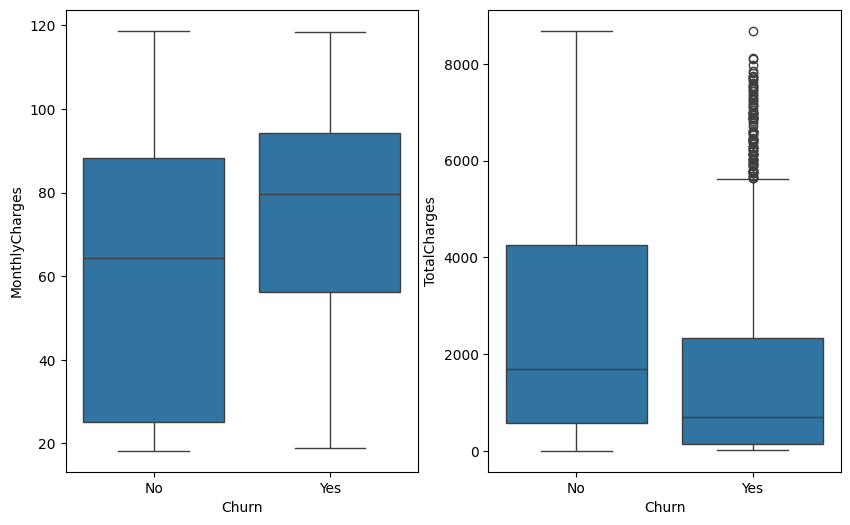

In [14]:
# plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
s1 = sns.boxplot(data=df_telco, y='MonthlyCharges', x='Churn', ax=ax[0])
s2 = sns.boxplot(data=df_telco, y='TotalCharges', x='Churn', ax=ax[1])

s1.set_xticklabels(['No', 'Yes'])
s2.set_xticklabels(['No', 'Yes'])

plt.show()
# plt.savefig('3.2.1 quantity rugplot.png', dpi=100)

### Customer churn in relation to phone service and multiple lines
(No decisive outcome produced)

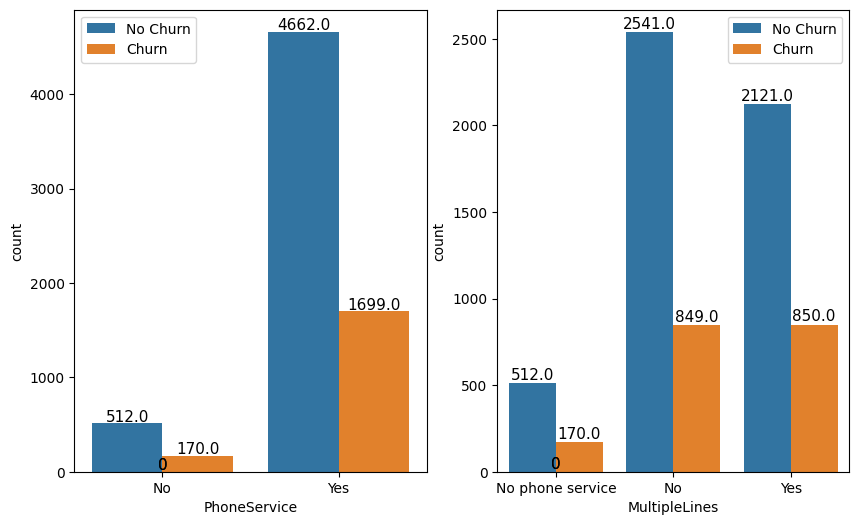

In [15]:
# plt.figure(figsize=(12, 8))
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
s1 = sns.countplot(data=df_telco, x='PhoneService', hue='Churn', ax=ax[0])
s2 = sns.countplot(data=df_telco, x='MultipleLines', hue='Churn', ax=ax[1])

# write count labels in the plot
for plot in [s1, s2]:
    for rect in plot.patches:
        plot.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 20, rect.get_height(), horizontalalignment='center', fontsize=11)

s1.legend(['No Churn', 'Churn'])
s2.legend(['No Churn', 'Churn'])

plt.show()
# plt.savefig('3.2.1 quantity rugplot.png', dpi=100)